In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
f = "../data/temixco.csv"
tmx = pd.read_csv(f, index_col=0, parse_dates=True)
# tmx.head()

# Radiación solar en Temixco, Morelos, México durante enero.

En la siguiente celda se muestra la orden para aislar los datos de la radiación global ($I_g$) del mes 2018 y enero @fig-Ig

In [3]:
#| echo: true
enero = tmx.loc["2018-01"].Ig

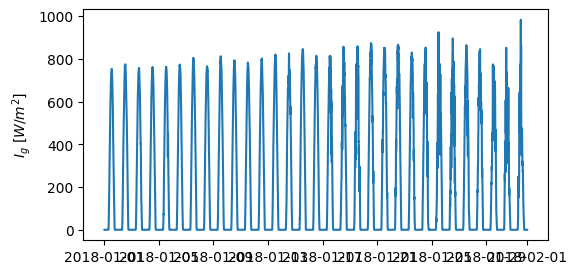

In [4]:
#| label: fig-Ig
#| fig-cap: Irradiancia global durante enero.

fig, ax = plt.subplots(figsize=(6,3))
ax.plot(enero)
ax.set_ylabel("$I_g$ $[W/m^2]$");

In [5]:
#| ouput: false
Is = ["Ig"]
tmx[Is].resample("H").mean()


,Ig
time,
2018-01-01 00:00:00,0.0
2018-01-01 01:00:00,0.0
2018-01-01 02:00:00,0.0
2018-01-01 03:00:00,0.0
2018-01-01 04:00:00,0.0
...,...
2018-12-31 19:00:00,0.0
2018-12-31 20:00:00,0.0
2018-12-31 21:00:00,0.0


In [6]:
dias_mean = tmx[Is].groupby(by=[tmx.index.hour]).mean()
dias_max  = tmx[Is].groupby(by=[tmx.index.hour]).max()
dias_min  = tmx[Is].groupby(by=[tmx.index.hour]).min()

In [7]:
#| ouput: false
# fig, ax = plt.subplots()
# ax.plot(dias_mean)
# ax.plot(dias_max)
# ax.plot(dias_min)

# Dia Promedio anual

In [8]:
# fig, ax = plt.subplots()
# ax.fill_between(x=dias_mean.index, y1=dias_min.Ig, y2=dias_max.Ig, color="orange", alpha=0.3)
# ax.plot(dias_mean, color="red")
# ax.set_xticks(np.arange(0,25,2));
# ax.set_xticklabels(np.arange(0,25,2));

In [9]:
dias_mean = tmx.groupby(by=(tmx.index.strftime("%H:%M"))).mean()
dias_max  = tmx.groupby(by=(tmx.index.strftime("%H:%M"))).max()
dias_min  = tmx.groupby(by=(tmx.index.strftime("%H:%M"))).min()

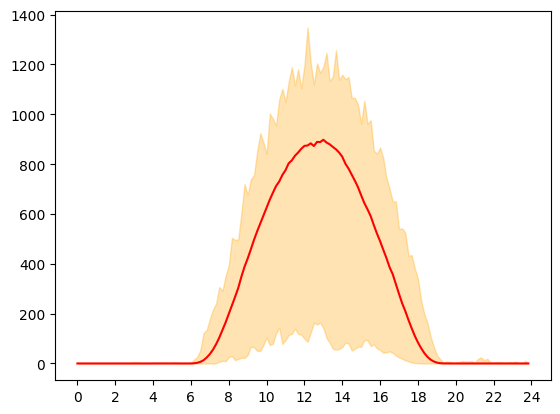

In [10]:
#| label: fig-dia-promedio
#| fig-cap: Día promedio anual con máximos y mínimos.

fig, ax = plt.subplots()
ax.fill_between(x=dias_mean.index, y1=dias_min.Ig, y2=dias_max.Ig, color="orange", alpha=0.3)
ax.plot(dias_mean.Ig, color="red")
ax.set_xticks(np.arange(0,145,12));
ax.set_xticklabels(np.arange(0,25,2));
